<a href="https://colab.research.google.com/github/Gail529/Taylor/blob/main/Taylor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_excel('/content/audio_features.xlsx')
data.head(2)

,album,song,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,evermore,willow,0.833,0.392,0.574,0.00179,0.145,-9.195,0.1700,81.112,0.529,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,evermore,champagne problems,0.920,0.462,0.240,0.00000,0.113,-12.077,0.0377,171.319,0.320,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# AUDIO FEATURES
Popularity

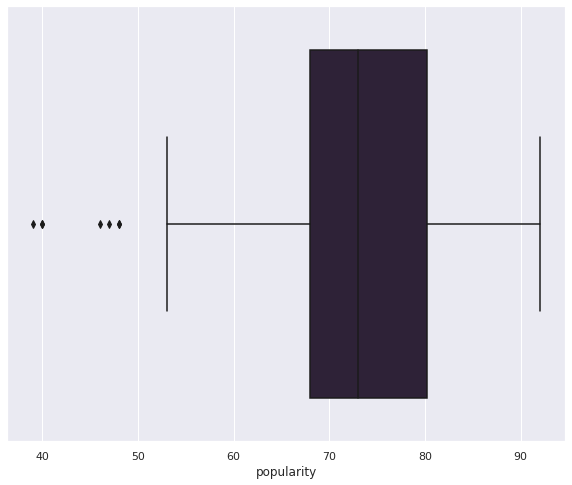

In [31]:
sns.set_theme(style='darkgrid',palette='mako')
plt.figure(figsize=(10,8))
ax =sns.boxplot(x=data['popularity'])

Text(0.5, 1.0, 'Most popular songs')

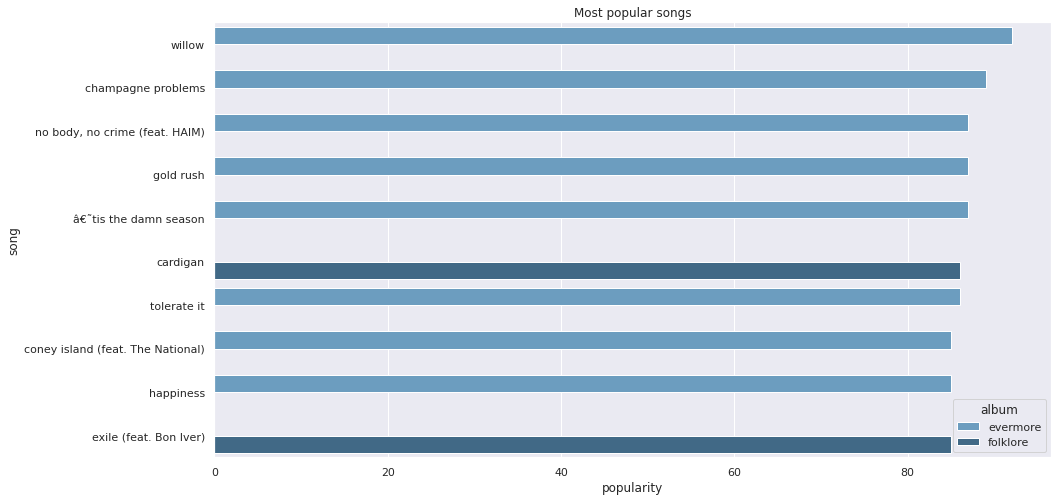

In [33]:
pop_data=data
pop_data.sort_values(by=['popularity'],inplace=True,ascending=False)
final_data=pop_data.head(10)
sns.set_theme(style='darkgrid',palette='mako')
plt.figure(figsize=(15,8))
ax = sns.barplot(x="popularity", y="song", data=final_data,palette="Blues_d",hue="album")
plt.title('Most popular songs')

Text(0.5, 1.0, 'Least popular songs')

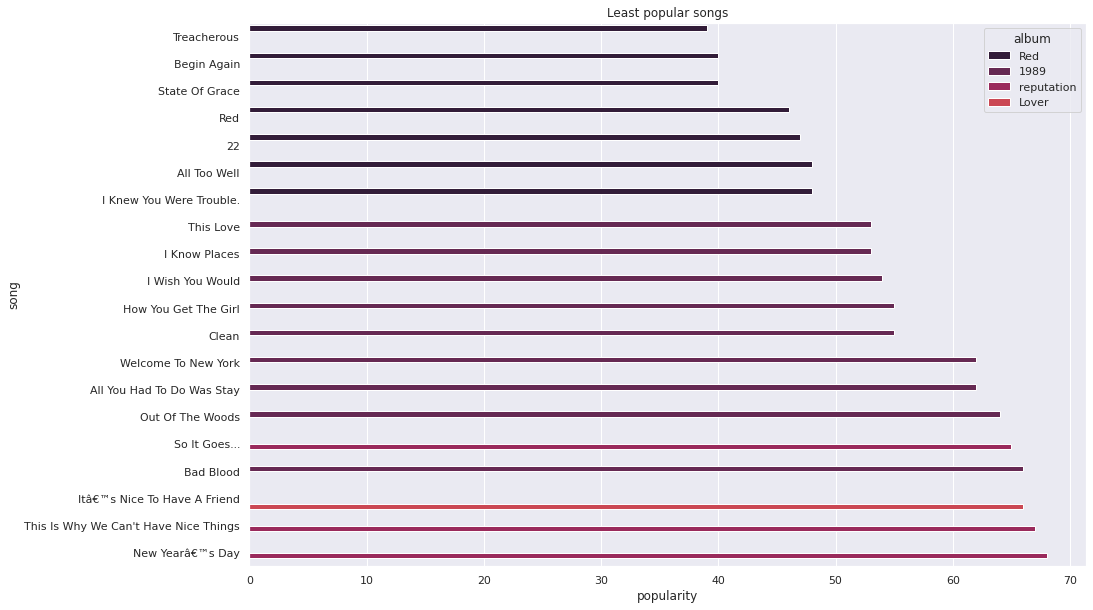

In [42]:
pop_data=data
pop_data.sort_values(by=['popularity'],inplace=True,ascending=True)
final_data=pop_data.head(20)
sns.set_theme(style='darkgrid',palette="rocket")
plt.figure(figsize=(15,10))
ax = sns.barplot(x="popularity", y="song", data=final_data,hue="album")
plt.title('Least popular songs')

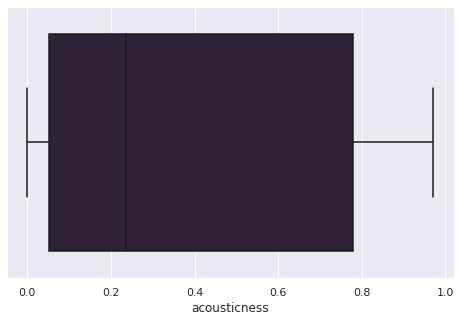

In [45]:
sns.set_theme(style='darkgrid',palette='mako')
plt.figure(figsize=(8,5))
ax =sns.boxplot(x=data['acousticness'])

Text(0.5, 1.0, 'Least Acoustic songs')

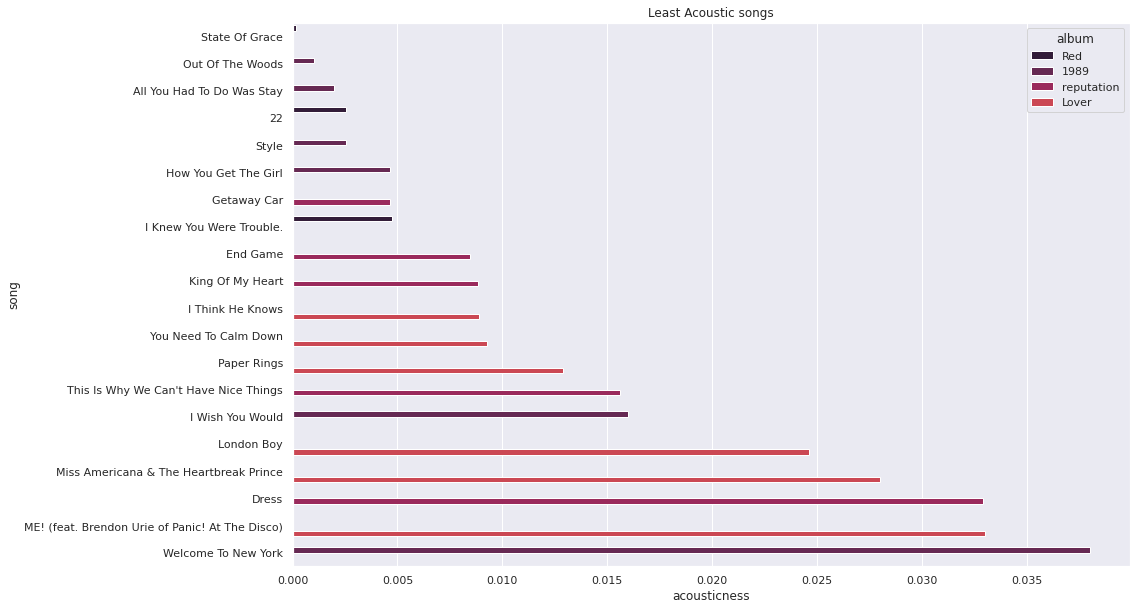

In [48]:
acoustic_data=data
acoustic_data.sort_values(by=['acousticness'],inplace=True,ascending=True)
final_data=acoustic_data.head(20)
sns.set_theme(style='darkgrid',palette="rocket")
plt.figure(figsize=(15,10))
ax = sns.barplot(x="acousticness", y="song", data=final_data,hue="album")
plt.title('Least Acoustic songs')

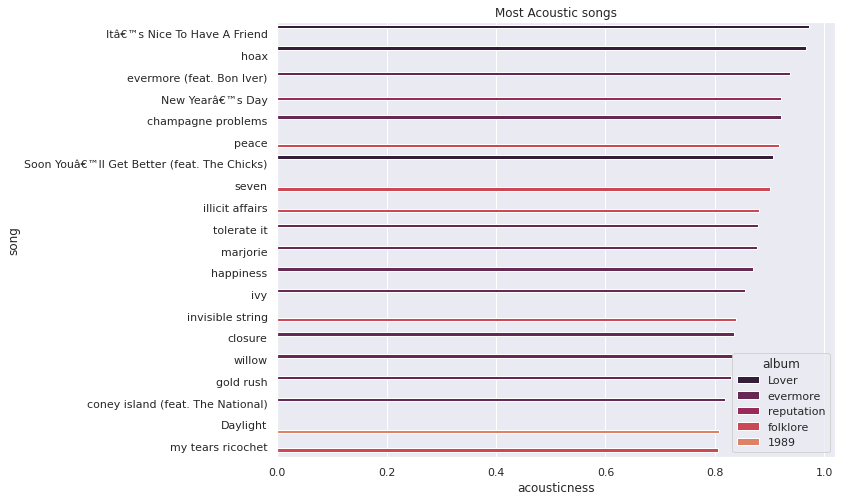

In [54]:
acoustic_data=data
acoustic_data.sort_values(by=['acousticness'],inplace=True,ascending=False)
final_data=acoustic_data.head(20)
sns.set_theme(style='darkgrid',palette="rocket")
plt.figure(figsize=(10,8))
ax = sns.barplot(x="acousticness", y="song", data=final_data,hue="album")
plt.title('Most Acoustic songs')
plt.show()


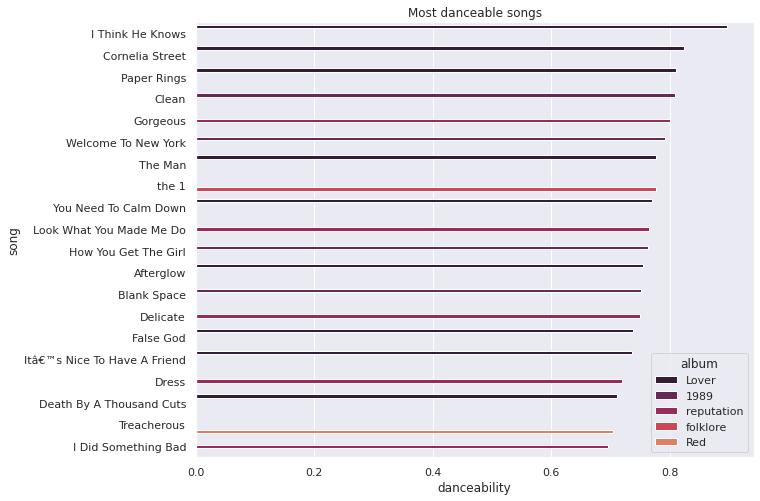

In [58]:

dance_data=data
dance_data.sort_values(by=['danceability'],inplace=True,ascending=False)
final_data=dance_data.head(20)
sns.set_theme(style='darkgrid',palette="rocket")
plt.figure(figsize=(10,8))
ax = sns.barplot(x="danceability", y="song", data=final_data,hue="album")
plt.title('Most danceable songs')
plt.show()


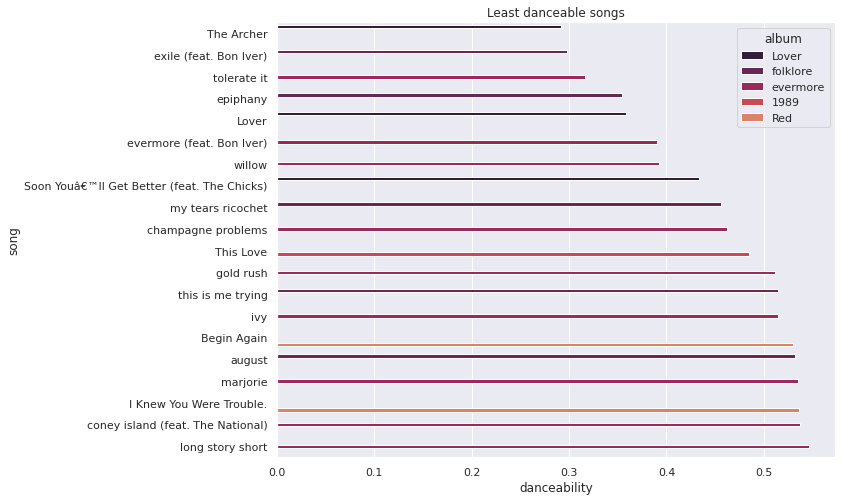

In [60]:
dance_data=data
dance_data.sort_values(by=['danceability'],inplace=True,ascending=True)
final_data=dance_data.head(20)
sns.set_theme(style='darkgrid',palette="rocket")
plt.figure(figsize=(10,8))
ax = sns.barplot(x="danceability", y="song", data=final_data,hue="album")
plt.title('Least danceable songs')
plt.show()


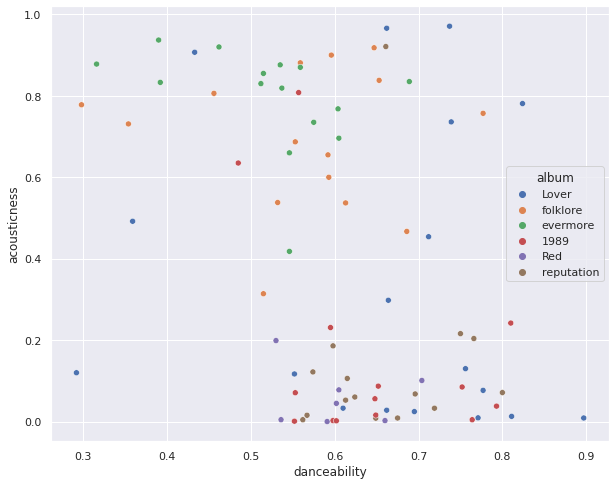

In [68]:
plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
ax = sns.scatterplot(data=data,x="danceability",y="acousticness",hue="album")


In [ ]:
plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
ax = sns.scatterplot(data=data,x="danceability",y="acousticness",hue="album")